<a href="https://colab.research.google.com/github/Anantbir-S/AER850_Project2/blob/main/Updated_learning_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 703s 10s/step - accuracy: 0.3631 - loss: 148.4001 - val_accuracy: 0.4965 - val_loss: 26.9630 - learning_rate: 0.0010
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.3925 - loss: 42.4317 - val_accuracy: 0.4385 - val_loss: 15.5837 - learning_rate: 0.0010
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.3812 - loss: 14.4745 - val_accuracy: 0.2042 - val_loss: 11.4459 - learning_rate: 0.0010
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.3984 - loss: 9.9008 - val_accuracy: 0.3411 - val_loss: 8.1337 - learning_rate: 0.0010
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.4173 - loss: 7.8641 - val_accuracy: 0.4640 - val_loss: 6.6162 - learning_rate: 0.0010
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.4017 - loss: 6.2202 - val_accuracy: 0.4432 - val_loss: 5.5759 - learning_rate: 9.0484e-04
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.4395 - loss: 5.0232 - val_ac

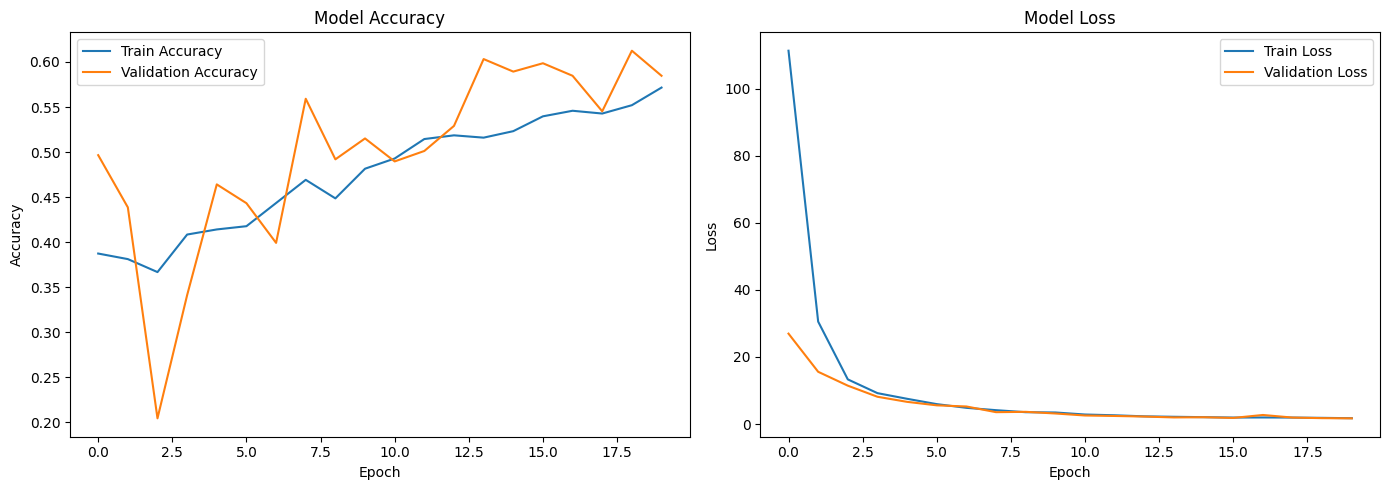

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define image dimensions
input_image_shape = (500, 500, 3)

# Define base directory
base_dir = '/content/drive/MyDrive/AER850 Project 2/Project 2 Data/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

# Create image data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(500, 500),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(500, 500),
    batch_size=32,
    class_mode='categorical'
)

# Define the CNN model with an additional convolutional layer
model = Sequential([
    Input(shape=input_image_shape),
    Conv2D(16, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    MaxPooling2D((2, 2)),
    Dropout(0.25),


    # Second Convolutional Block
    Conv2D(64, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.2),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.2),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fourth Convolutional Block (Additional Layer for More Complexity)
    Conv2D(256, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.2),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.6),  # Higher dropout for further regularization

    # Output Layer
    Dense(3, activation='softmax')
])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

lr_scheduler = LearningRateScheduler(scheduler)

# Compile the model with an initial learning rate
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Increased epochs for more training time
    callbacks=[lr_scheduler, early_stopping, reduce_lr]
)

# Plot training and validation accuracy/loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

